# 이미지 준비

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

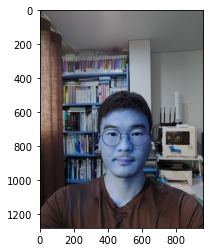

In [18]:
my_image_path = os.getenv('HOME') + '/mini_projects/_E-03_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path) #open CV는 BGR순으로 이미지 채널을 읽음. 그래서 파일이름을 bgr
img_bgr = cv2.resize(img_bgr, (960, 1280))
img_show = img_bgr.copy()  # 출력용 이미지 img_show
plt.imshow(img_bgr)
plt.show()

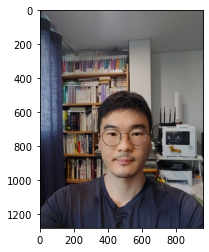

In [19]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # open CV는 BGR순으로 이미지 채널을 읽음. plt, dlib는 RGB순.
plt.imshow(img_rgb)
plt.show()   # <<<< 이 코드가 없어도 사진은 나오는데 뭔 차이지?

# Face Detection

In [20]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   # hog detector 선언

In [21]:
dlib_rects = detector_hog(img_rgb, 1) # 두번째 파라미터는 이미지 피라미드의 숫자. 
print(dlib_rects)  # 찾은 얼굴영역 좌표

rectangles[[(348, 634) (669, 955)]]


In [22]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 출력용 이미지 img_show 에 boundingbox 작업

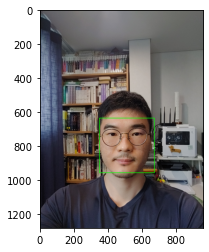

In [23]:
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # 출력용 이미지 img_show  채널 변경
plt.imshow(img_show_rgb)
plt.show()

# Face Landmark

In [24]:
model_path = os.getenv('HOME') + '/mini_projects/_E-03_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [25]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p:(p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print(len(list_landmarks[0]))

68


<function matplotlib.pyplot.show(close=None, block=None)>

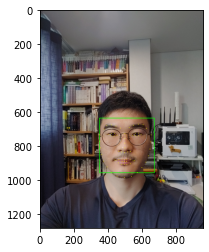

In [26]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) #yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show

In [27]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0] - dlib_rect.height()//2 # 여기가 핵심
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(496, 809)
(x,y) : (335,648)
(w,h) : (322,322)


(322, 322, 3)


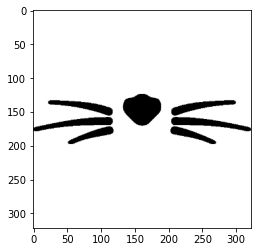

In [28]:
sticker_path = os.getenv('HOME') + '/mini_projects/_E-03_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [29]:
sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) #왜 0에서 255로 바꿔야 되는 건가?
print(img_sticker.shape[0])

322


<function matplotlib.pyplot.show(close=None, block=None)>

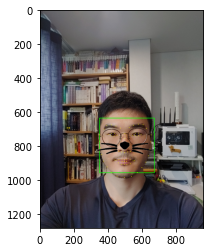

In [30]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show

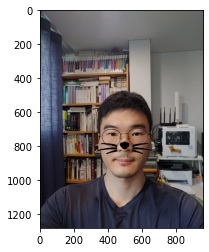

In [31]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) #왜 0에서 255로 바꿔야 되는 건가?
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()